In [3]:
import pandas as pd



In [4]:
df = pd.read_excel('dataset.xlsx')
df.head()


,Country Name,Country Code,GDP growth,GDP per capita,Inflation consumer prices (annual %),Trade (% of GDP),Unemployment with advanced education (% of total labor force with advanced education)
0,Afghanistan,AFG,-2.351101,553.036131,..,..,14.38
1,Albania,ALB,-3.302082,4418.660885,1.620887,59.829729,..
2,Algeria,DZA,-5.1,3873.508733,2.415131,45.330511,..
3,American Samoa,ASM,5.065359,14303.627033,..,156.005587,..
4,Andorra,AND,-11.18394,34394.414041,..,..,..


In [5]:
del df['Unemployment with advanced education (% of total labor force with advanced education)']
del df['GDP per capita']


In [6]:
df.rename(columns={'GDP growth': 'GDP','Inflation consumer prices (annual %)': 'Inflation','Trade (% of GDP)': 'Trade'}, inplace=True)
print(df.columns)


Index(['Country Name', 'Country Code', 'GDP', 'Inflation', 'Trade'], dtype='object')


In [7]:
print(df.columns)
sum_GDP = 0
i = 0
for value in df['GDP']:
    if (value != '..'):
        sum_GDP += value
        i+=1
avg_GDP = sum_GDP/i




sum_Inflation = 0
j = 0
for value in df['Inflation']:
    if (value != '..'):
        sum_Inflation += value
        j+=1
avg_Inflation = sum_Inflation/j


sum_Trade = 0
k = 0
for value in df['Trade']:
    if (value != '..'):
        sum_Trade += value
        k+=1
avg_Trade = sum_Trade/k


#mean = df['GDP'].mean()
    

print("avg_GDP using loop:", avg_GDP)
print("avg_Inflation using loop:", avg_Inflation)
print("avg_Trade using loop:", avg_Trade)




Index(['Country Name', 'Country Code', 'GDP', 'Inflation', 'Trade'], dtype='object')
avg_GDP using loop: -5.065449234361873
avg_Inflation using loop: 8.057423512647146
avg_Trade using loop: 84.36905428635443


In [8]:
df['GDP'] = df['GDP'].replace('..', avg_GDP)
df['Inflation'] = df['Inflation'].replace('..', avg_Inflation)
df['Trade'] = df['Trade'].replace('..', avg_Trade)
df.head()

,Country Name,Country Code,GDP,Inflation,Trade
0,Afghanistan,AFG,-2.351101,8.057424,84.369054
1,Albania,ALB,-3.302082,1.620887,59.829729
2,Algeria,DZA,-5.100000,2.415131,45.330511
3,American Samoa,ASM,5.065359,8.057424,156.005587
4,Andorra,AND,-11.183940,8.057424,84.369054


In [10]:
for index, value in df.iterrows():
    if value['GDP'] <= 1:
        df.loc[index, 'EGL'] = 'low GDP'
    elif  1 <= value['GDP'] <= 3:
        df.loc[index, 'EGL'] = 'medium GDP'
    elif  3 <= value['GDP'] <= 5:
        df.loc[index, 'EGL'] = 'high GDP'
    else :
        df.loc[index, 'EGL'] = 'very high GDP'
df.head()



        
        

,Country Name,Country Code,GDP,Inflation,Trade,EGL
0,Afghanistan,AFG,-2.351101,8.057424,84.369054,low GDP
1,Albania,ALB,-3.302082,1.620887,59.829729,low GDP
2,Algeria,DZA,-5.100000,2.415131,45.330511,low GDP
3,American Samoa,ASM,5.065359,8.057424,156.005587,very high GDP
4,Andorra,AND,-11.183940,8.057424,84.369054,low GDP


In [24]:
df1 = pd.read_excel('dataset.xlsx', sheet_name='Feuil5')
df11 = pd.DataFrame(df1);
df1.head()

,high income,Low & middle income,Low income,Lower middle income,Middle income,Upper middle income
0,AMERICAN SAMOA,AFGHANISTAN,AFGHANISTAN,ALGERIA,ALBANIA,ALBANIA
1,ANDORRA,ALBANIA,BURKINA FASO,ANGOLA,ALGERIA,ARGENTINA
2,ANTIGUA AND BARBUDA,ALGERIA,BURUNDI,BANGLADESH,ANGOLA,ARMENIA
3,ARUBA,ANGOLA,CENTRAL AFRICAN REPUBLIC,BENIN,ARGENTINA,AZERBAIJAN
4,AUSTRALIA,ARGENTINA,CHAD,BHUTAN,ARMENIA,BELARUS


In [40]:
for index, value in df.iterrows():
    if value['Country Name'].upper() in df11['high income'].values:
        df.loc[index, 'Income_level'] = 'high income'
    elif value['Country Name'].upper() in df11['Low income'].values:
        df.loc[index, 'Income_level'] = 'low income'
    elif value['Country Name'].upper() in df11['Middle income'].values:
        df.loc[index, 'Income_level'] = 'middle income'
df.head(200)

,Country Name,Country Code,GDP,Inflation,Trade,EGL,Income_level
0,Afghanistan,AFG,-2.351101,8.057424,84.369054,low GDP,low income
1,Albania,ALB,-3.302082,1.620887,59.829729,low GDP,middle income
2,Algeria,DZA,-5.100000,2.415131,45.330511,low GDP,middle income
3,American Samoa,ASM,5.065359,8.057424,156.005587,very high GDP,high income
4,Andorra,AND,-11.183940,8.057424,84.369054,low GDP,high income
...,...,...,...,...,...,...,...
195,Tonga,TON,0.488645,-0.349738,85.534023,low GDP,middle income
196,Trinidad and Tobago,TTO,-7.678331,0.598986,84.369054,low GDP,high income
197,Tunisia,TUN,-8.817879,5.634151,84.240772,low GDP,middle income
198,Turkiye,TUR,1.940032,12.278957,60.955931,medium GDP,middle income


In [45]:
index = df[df['Country Name'] == 'Israel'].index
df.loc[index, 'Country Name'] = 'Palestine'
df.loc[index, 'Country Code'] = 'PS'


In [46]:
df.head(100)

,Country Name,Country Code,GDP,Inflation,Trade,EGL,Income_level
0,Afghanistan,AFG,-2.351101,8.057424,84.369054,low GDP,low income
1,Albania,ALB,-3.302082,1.620887,59.829729,low GDP,middle income
2,Algeria,DZA,-5.100000,2.415131,45.330511,low GDP,middle income
3,American Samoa,ASM,5.065359,8.057424,156.005587,very high GDP,high income
4,Andorra,AND,-11.183940,8.057424,84.369054,low GDP,high income
...,...,...,...,...,...,...,...
95,Palestine,PS,-1.857289,-0.614412,50.883377,low GDP,high income
96,Italy,ITA,-8.979126,-0.137708,55.273022,low GDP,high income
97,Jamaica,JAM,-9.900000,5.226778,65.859766,low GDP,middle income
98,Japan,JPN,-4.278604,-0.024996,31.367969,low GDP,high income


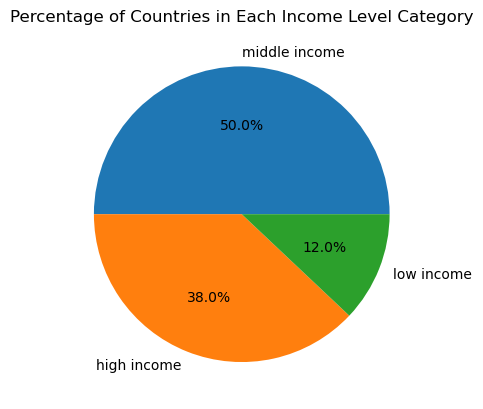

In [66]:
import matplotlib.pyplot as plt

# grouped = df.groupby('Income_level')['Country Name'].apply(list).reset_index(name='Countries')

# #print(grouped)

# for  group in grouped:
#     labels = group['Income_level']
#     sizes = [1] * len(labels)

# plt.figure()  # Create a separate figure for each pie chart
# plt.pie(sizes, labels=labels, autopct='%1.1f%%')
# plt.title(f'Distribution for Category: {category}')

# plt.show()

percentages = df['Income_level'].value_counts(normalize=True) * 100

# Plotting a pie chart
plt.figure()
plt.pie(percentages, labels=percentages.index, autopct='%1.1f%%')
plt.title('Percentage of Countries in Each Income Level Category')
plt.show()

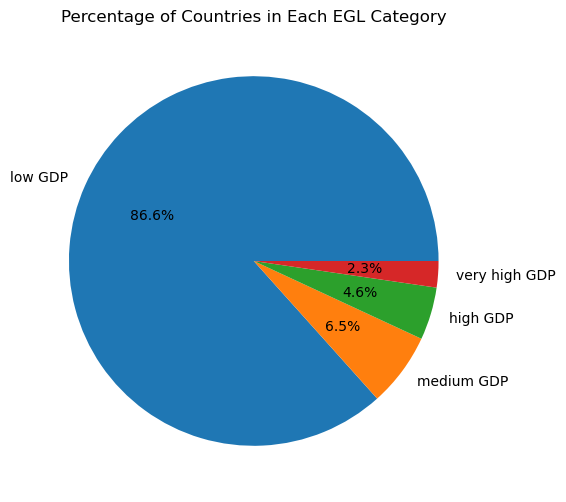

In [67]:
percentages = df['EGL'].value_counts(normalize=True) * 100

# Plotting a pie chart
plt.figure(figsize=(8, 6))
plt.pie(percentages, labels=percentages.index, autopct='%1.1f%%')
plt.title('Percentage of Countries in Each EGL Category')
plt.show()